In [1]:
%matplotlib inline

# Import dependencies
import pandas as pd
import numpy as np
import datetime as dt
import time
import matplotlib.pyplot as plt

In [2]:
# Read CSV to DataFrame
df = pd.read_csv('salesdata.csv')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [3]:
# View data types
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [4]:
# View number of unique values
df.nunique()

Row ID           9800
Order ID         4922
Order Date       1230
Ship Date        1326
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              529
State              49
Postal Code       626
Region              4
Product ID       1861
Category            3
Sub-Category       17
Product Name     1849
Sales            5757
dtype: int64

In [5]:
# Drop irrelevant columns
sales_df = df.drop(['Row ID', 'Ship Date', 'Ship Mode', 'Country', 'Postal Code'], axis=1)
sales_df

,Order ID,Order Date,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,SH-19975,Sally Hughsby,Corporate,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,CA-2016-128608,12/01/2016,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,CA-2016-128608,12/01/2016,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,CA-2016-128608,12/01/2016,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
# Check for NaNs
sales_df.isnull().values.any()

False

In [7]:
# Convert "Order Date" from string to date
sales_df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_df['Order Date'] = sales_df['Order Date'].apply(lambda x: dt.datetime.strftime(x, '%m/%d/%Y'))

# Assign quarter based on Order Date
sales_df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_df['Quarter'] = sales_df['Order Date'].dt.to_period('Q')
sales_df

,Order ID,Order Date,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quarter
0,CA-2017-152156,2017-08-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017Q3
1,CA-2017-152156,2017-08-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017Q3
2,CA-2017-138688,2017-12-06,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017Q4
3,US-2016-108966,2016-11-10,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016Q4
4,US-2016-108966,2016-11-10,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,2017-05-21,SH-19975,Sally Hughsby,Corporate,Chicago,Illinois,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,2017Q2
9796,CA-2016-128608,2016-12-01,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,2016Q4
9797,CA-2016-128608,2016-12-01,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,2016Q4
9798,CA-2016-128608,2016-12-01,CS-12490,Cindy Schnelling,Corporate,Toledo,Ohio,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,2016Q4


In [8]:
# Look at data types
sales_df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Customer ID              object
Customer Name            object
Segment                  object
City                     object
State                    object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quarter           period[Q-DEC]
dtype: object

In [9]:
# Total Sales by Year
sales_df['Year'] = pd.DatetimeIndex(sales_df['Order Date']).year
total_sales_per_year = sales_df.groupby(['Year']).sum()['Sales']
total_sales_per_year

Year
2015    479856.2081
2016    459436.0054
2017    600192.5500
2018    722052.0192
Name: Sales, dtype: float64

In [10]:
# Total Sales by Customer ID
total_sales_per_customer = sales_df.groupby(['Customer ID', 'Year']).sum()['Sales']
total_sales_per_customer

Customer ID  Year
AA-10315     2015     756.048
             2016      26.960
             2017    4406.072
             2018     374.480
AA-10375     2015      50.792
                       ...   
ZC-21910     2017    3215.733
             2018     227.066
ZD-21925     2015     244.760
             2017    1187.744
             2018      61.440
Name: Sales, Length: 2481, dtype: float64

In [11]:
# Total Sales by Segment
total_sales_per_segment = sales_df.groupby(['Segment']).sum()['Sales'].map("${:,.2f}".format)
total_sales_per_segment

Segment
Consumer       $1,148,060.53
Corporate        $688,494.07
Home Office      $424,982.18
Name: Sales, dtype: object

In [12]:
# Total Sales by Region and State
total_sales_per_state = sales_df.groupby(['Region','State']).sum()['Sales'].map("${:,.2f}".format)
total_sales_per_state

Region   State               
Central  Illinois                 $79,236.52
         Indiana                  $48,718.40
         Iowa                      $4,443.56
         Kansas                    $2,914.31
         Michigan                 $76,136.07
         Minnesota                $29,863.15
         Missouri                 $22,205.15
         Nebraska                  $7,464.93
         North Dakota                $919.91
         Oklahoma                 $19,683.39
         South Dakota              $1,315.56
         Texas                   $168,572.53
         Wisconsin                $31,173.43
East     Connecticut              $13,384.36
         Delaware                 $27,323.00
         District of Columbia      $2,865.02
         Maine                     $1,270.53
         Maryland                 $23,705.52
         Massachusetts            $28,634.43
         New Hampshire             $7,292.52
         New Jersey               $34,610.97
         New York        

In [13]:
# Total Sales by Region and Year
total_sales_per_region = sales_df.groupby(['Region', 'Year']).sum()['Sales'].map("${:,.2f}".format)
total_sales_per_region

Region   Year
Central  2015    $102,920.52
         2016    $102,425.17
         2017    $145,673.88
         2018    $141,627.34
East     2015    $127,652.82
         2016    $153,225.18
         2017    $178,511.54
         2018    $210,129.19
South    2015    $103,374.91
         2016     $70,076.08
         2017     $93,535.90
         2018    $122,164.57
West     2015    $145,907.96
         2016    $133,709.57
         2017    $182,471.23
         2018    $248,130.93
Name: Sales, dtype: object

In [14]:
# Total Sales by Category and Year
total_sales_per_category = sales_df.groupby(['Category', 'Year']).sum()['Sales'].map("${:,.2f}".format)
total_sales_per_category

Category         Year
Furniture        2015    $156,477.88
                 2016    $164,053.87
                 2017    $195,813.04
                 2018    $212,313.79
Office Supplies  2015    $149,512.82
                 2016    $133,124.41
                 2017    $182,417.57
                 2018    $240,367.54
Technology       2015    $173,865.51
                 2016    $162,257.73
                 2017    $221,961.94
                 2018    $269,370.69
Name: Sales, dtype: object

In [15]:
# Total Sales by Subcategory
total_sales_per_subcategory = sales_df.groupby(['Sub-Category']).sum()['Sales']
#total_sales_per_subcategory

# Top 5 subcategories that sell the most
subcat_df = pd.DataFrame(data=total_sales_per_subcategory)
sort_subcat_df = subcat_df.sort_values(by=['Sales'], ascending=False)
sort_subcat_df['Sales'] = sort_subcat_df['Sales'].map("${:,.2f}".format)
sort_subcat_df.head()

,Sales
Sub-Category,
Phones,"$327,782.45"
Chairs,"$322,822.73"
Storage,"$219,343.39"
Tables,"$202,810.63"
Binders,"$200,028.79"


In [16]:
# Total Sales by Product Name
total_sales_per_product = sales_df.groupby(['Product Name']).sum()['Sales']
#total_sales_per_product

# Top 10 products that sell the most
product_df = pd.DataFrame(data=total_sales_per_product)
sort_product_df = product_df.sort_values(by=['Sales'], ascending=False)
sort_product_df['Sales'] = sort_product_df['Sales'].map("${:,.2f}".format)
sort_product_df.head(10)

,Sales
Product Name,
Canon imageCLASS 2200 Advanced Copier,"$61,599.82"
Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind,"$27,453.38"
Cisco TelePresence System EX90 Videoconferencing Unit,"$22,638.48"
HON 5400 Series Task Chairs for Big and Tall,"$21,870.58"
GBC DocuBind TL300 Electric Binding System,"$19,823.48"
GBC Ibimaster 500 Manual ProClick Binding System,"$19,024.50"
Hewlett Packard LaserJet 3310 Copier,"$18,839.69"
"HP Designjet T520 Inkjet Large Format Printer - 24"" Color","$18,374.90"
GBC DocuBind P400 Electric Binding System,"$17,965.07"


In [42]:
# Top 10 Customers
customers_df = sales_df.groupby(['Customer Name']).sum()['Sales']
#customers_df

# Top 10 customers who buy the most
cust_df = pd.DataFrame(data=customers_df)
sort_customer_df = cust_df.sort_values(by=['Sales'], ascending=False)
sort_customer_df['Sales'] = sort_customer_df['Sales'].map("${:,.2f}".format)
top_spenders = sort_customer_df.head(10)
top_spenders = top_spenders.reset_index()
top_spenders

,Customer Name,Sales
0,Sean Miller,"$25,043.05"
1,Tamara Chand,"$19,052.22"
2,Raymond Buch,"$15,117.34"
3,Tom Ashbrook,"$14,595.62"
4,Adrian Barton,"$14,473.57"
5,Ken Lonsdale,"$14,175.23"
6,Sanjit Chand,"$14,142.33"
7,Hunter Lopez,"$12,873.30"
8,Sanjit Engle,"$12,209.44"
9,Christopher Conant,"$12,129.07"


In [51]:
# Top 10 spenders and their top purchases
top0 = top_spenders['Customer Name'][0]
top1 = top_spenders['Customer Name'][1]
top2 = top_spenders['Customer Name'][2]
top3 = top_spenders['Customer Name'][3]
top4 = top_spenders['Customer Name'][4]
top5 = top_spenders['Customer Name'][5]
top6 = top_spenders['Customer Name'][6]
top7 = top_spenders['Customer Name'][7]
top8 = top_spenders['Customer Name'][8]
top9 = top_spenders['Customer Name'][9]

top_spenders_df = sales_df.loc[(sales_df['Customer Name'] == top0) | (sales_df['Customer Name'] == top1) | 
                              (sales_df['Customer Name'] == top2) | (sales_df['Customer Name'] == top3) | 
                              (sales_df['Customer Name'] == top4) | (sales_df['Customer Name'] == top5) |
                              (sales_df['Customer Name'] == top6) | (sales_df['Customer Name'] == top7) |
                              (sales_df['Customer Name'] == top8) | (sales_df['Customer Name'] == top9)]
#top_spenders_df

df_agg = top_spenders_df.groupby(['Customer Name', 'Product Name']).agg({'Sales':sum})
df_agg
g = df_agg['Sales'].groupby('Customer Name', group_keys=False)
res = g.apply(lambda x: x.sort_values(ascending=False).head(3))
#res
format_df = pd.DataFrame(data=res)
format_df['Sales'] = format_df['Sales'].map("${:,.2f}".format)
format_df

Sales
Customer Name      Product Name                                                  
Adrian Barton      GBC Ibimaster 500 Manual ProClick Binding System     $9,892.74
                   Ibico Ibimaster 300 Manual Binding System            $1,103.97
                   3M Polarizing Task Lamp with Clamp Arm, Light Gray     $821.88
Christopher Conant Canon imageCLASS 2200 Advanced Copier                $8,399.98
                   Canon PC1060 Personal Laser Copier                   $2,799.96
                   Global Leather Task Chair, Black                       $287.97
Hunter Lopez       Canon imageCLASS 2200 Advanced Copier               $10,499.97
                   Hon 4700 Series Mobuis Mid-Back Task Chairs wit...   $1,067.94
                   Apple iPhone 5C                                        $699.93
Ken Lonsdale       High Speed Automatic Electric Letter Opener          $8,187.65
                   Mitel MiVoice 5330e IP Phone                         $1,979.93
                   ClearOne Communications CHAT 70 OC Speaker Phone       $635.96
Raymond Buch       Canon imageCLASS 2200 Advanced Copier               $13,999.96
                   Boston 1645 Deluxe Heavier-Duty Electric Pencil...     $263.88
                   Fellowes Bankers Box Recycled Super Stor/Drawer        $161.94
Sanjit Chand       Ibico EPK-21 Electric Binding System                 $9,449.95
                   GBC DocuBind TL300 Electric Binding System           $1,793.98
                   Novimex Swivel Fabric Task Chair                       $603.92
Sanjit Engle       HP Designjet T520 Inkjet Large Format Printer -...   $8,749.95
                   Martin Yale Chadless Opener Electric Letter Opener   $1,332.50
                   Bretford CR8500 Series Meeting Room Furniture          $601.47
Sean Miller        Cisco TelePresence System EX90 Videoconferencin...  $22,638.48
                   Hewlett-Packard Deskjet 6540 Color Inkjet Printer      $821.30
                   SAFCO Commercial Wire Shelving, Black                  $663.07
Tamara Chand       Canon imageCLASS 2200 Advanced Copier               $17,499.95
                   Ibico Ibimaster 300 Manual Binding System              $735.98
                   Enermax Acrylux Wireless Keyboard                      $498.00
Tom Ashbrook       Canon imageCLASS 2200 Advanced Copier               $11,199.97
                   Polycom CX600 IP Phone VoIP phone                    $2,399.60
                   Compact Automatic Electric Letter Opener               $357.93

In [19]:
sales_df.head()

,Order ID,Order Date,Customer ID,Customer Name,Segment,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quarter,Year
0,CA-2017-152156,2017-08-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2017Q3,2017
1,CA-2017-152156,2017-08-11,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,2017Q3,2017
2,CA-2017-138688,2017-12-06,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2017Q4,2017
3,US-2016-108966,2016-11-10,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,2016Q4,2016
4,US-2016-108966,2016-11-10,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2016Q4,2016


In [20]:
# Quarterly sales
quarterly_sales = sales_df.groupby(['Year', 'Quarter']).sum(['Sales'])
quarterly_sales_df = pd.DataFrame(data = quarterly_sales)
quarterly_sales_df

Sales
Year Quarter             
2015 2015Q1    95444.4300
     2015Q2    83411.8406
     2015Q3   138500.2233
     2015Q4   162499.7142
2016 2016Q1    84565.4160
     2016Q2    97334.4352
     2016Q3   143003.2370
     2016Q4   134532.9172
2017 2017Q1   135945.9150
     2017Q2   144628.9808
     2017Q3   128221.0637
     2017Q4   191396.5905
2018 2018Q1   183444.5482
     2018Q2   125644.5095
     2018Q3   202504.9235
     2018Q4   210458.0380

In [21]:
# Quarterly sales growth
quarterly_sales_df['Sales Growth'] = quarterly_sales_df.Sales.pct_change() * 100
#quarterly_sales_df['Sales Growth'] = quarterly_sales_df.Sales/quarterly_sales_df.Sales.shift() - 1
quarterly_sales_df

Sales  Sales Growth
Year Quarter                           
2015 2015Q1    95444.4300           NaN
     2015Q2    83411.8406    -12.606906
     2015Q3   138500.2233     66.043840
     2015Q4   162499.7142     17.328124
2016 2016Q1    84565.4160    -47.959652
     2016Q2    97334.4352     15.099576
     2016Q3   143003.2370     46.919471
     2016Q4   134532.9172     -5.923166
2017 2017Q1   135945.9150      1.050299
     2017Q2   144628.9808      6.387147
     2017Q3   128221.0637    -11.344834
     2017Q4   191396.5905     49.270787
2018 2018Q1   183444.5482     -4.154746
     2018Q2   125644.5095    -31.508180
     2018Q3   202504.9235     61.172919
     2018Q4   210458.0380      3.927368

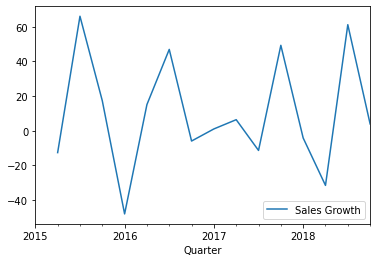

In [22]:
quarterly_sales_df.reset_index().plot(x='Quarter', y='Sales Growth')
plt.show()